# 3-6. 프로젝트: 고양이 수염 스티커 만들기

**Step 2. 얼굴 검출 & 랜드마크 검출 하기**

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.






In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


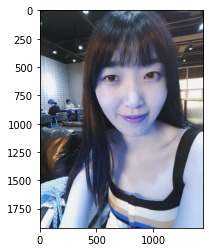

In [3]:
my_image_path = '/content/drive/MyDrive/아이펠/풀잎스쿨/data/프로젝트.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

**Step 1. 스티커 구하기 or 만들기**

스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

온라인 집사의 삶..

마침 flaticon 사이트에 고양이 수염 이미지가 공개되어 있습니다.

https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

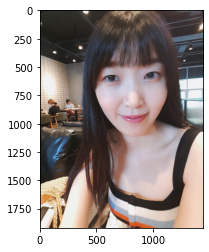

In [4]:
# RGB로 바꾸기 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [5]:
# sliding window를 사용해서 얼굴 위치 확인하기
detector_hog = dlib.get_frontal_face_detector()

# detector_hog로 bounding box를 추출
# dlib도 bgr이기 때문에 rbg로 변환시켜 준다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # 이미지 피라미드 수 1로 설정
dlib_rects # 자동으로 얼굴 영역이 될 부분을 인식하여 좌표를 도출한다.

rectangles[[(502, 428) (1167, 1094)]]

rectangles[[(502, 428) (1167, 1094)]]


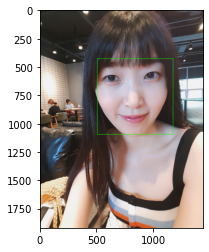

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**Step 3. 스티커 적용 위치 확인하기**

고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png)


In [7]:
model_path = '/content/drive/MyDrive/아이펠/풀잎스쿨/data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
landmark_predictor

In [8]:
list_landmarks = []

# face landmark 찾기
# points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있음
# (x, y) 형태로 변환 -> 68개의 튜플을 가진 리스트로 만들어 준다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 이미지에서 찾아진 얼굴마다 68개의 튜플을 가진 리스트가 list_landmarks안에 들어간다.
# 현재 사진에서는 list_landmarks는 얼굴이 하나 이므로, 인덱스 0밖에 없다.
print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(472, 600), (476, 691), (494, 779), (526, 859), (573, 931), (625, 993), (681, 1050), (744, 1095), (815, 1109), (887, 1090), (946, 1037), (1001, 974), (1049, 905), (1089, 829), (1113, 744), (1122, 656), (1117, 567), (519, 518), (561, 487), (617, 479), (674, 488), (727, 510), (893, 507), (939, 475), (994, 453), (1054, 448), (1101, 473), (813, 594), (818, 671), (823, 747), (828, 822), (756, 852), (790, 861), (826, 870), (861, 858), (894, 845), (571, 602), (612, 581), (660, 581), (704, 616), (658, 624), (609, 623), (918, 604), (953, 561), (1000, 551), (1043, 568), (1010, 595), (961, 603), (691, 919), (745, 928), (794, 922), (827, 931), (855, 919), (899, 918), (947, 909), (902, 969), (860, 998), (828, 1004), (793, 1000), (746, 977), (710, 927), (795, 948), (828, 952), (857, 945), (929, 920), (858, 949), (827, 956), (794, 952)]


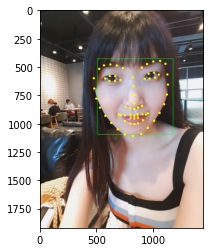

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) 
        # 처음에 lms에서 지정되어있는 radius로 그대로 진행했더니 내 사진의 크기가 너무 커서 점이 보이지 않았다. 
        # 오류인줄 알았으나 점이 너무 작아서 그런듯하여 radius를 10d으로 크게 했더니 출력됨
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**Step 4. 스티커 적용하기**

(1) 오늘 배운 `np.where` 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 `cv2.addWeighted()` 를 참고하세요.

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(826, 870)
(x,y) : (826,537)
(w,h) : (666,666)


In [11]:
sticker_path = '/content/drive/MyDrive/아이펠/풀잎스쿨/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(666, 666, 3)


In [12]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (493,537)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (493,537)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

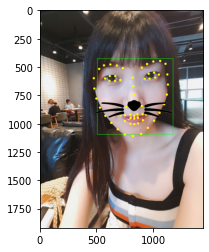

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

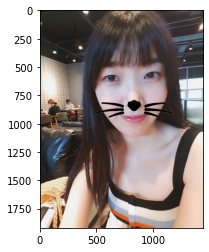

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

**Step 5. 문제점 찾아보기**

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

> 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.<br><br>
얼굴 각도에 따라 스티커가 어떻게 변해야할까요?<br>
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?<br>
실행 속도가 중요할까요?<br>
스티커앱을 만들 때 정확도가 얼마나 중요할까요?



- 이번 프로젝트에서 어려웠던 점

    생소한 코드가 많아서 코드길이가 길지 않았지만 어려웠다.
    (opencv, dlib 등)

- 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

    얼굴 사진에서 landmark가 표시되지 않아서 모델을 잘못 넣은것인지 수차례 반복해 보았다. 조원인 은지님께서 핸드폰 사진이 크기가 너무 커서 그런것 같다고, 은지님은 사진크기를 조정해서 넣었더니 잘 되었다고 하셨다.
    나는 점이 찍힌건 맞는 것같은데 사진 크기가 너무 커서 점이 안보이는 것같아서, cv2.circle의 파라미터 중 radius를 크게 10으로 잡아주었더니 무리없이 랜드마크가 표시된 것을 확인할 수 있었다.

- 루브릭 평가 지표를 맞추기 위해 시도한 것들 

    1. 자기만의 카메라앱 기능 구현을 완수하였다.<br>
        사진위에 스티커가 정상적으로 입혀졌다.

    2. 스티커 이미지를 정확한 원본 위치에 반영하였다.<br>
         Dlib landmark localization을 보고 스티커의 위치를 찾아서 인덱스 번호를 수정하였더니 위치가 알맞게 조정되었다.

    3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.<br>
        np.where에서 rgb값이 img_sticker==0으로 설정되어있어서 흰색으로 나와서 당황했다. 이후 255 (검정색)으로 변경하여 잘 출력되게 만들었다.

- 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정

    코드가 노드에 있는 코드랑 똑같아서 점수를 많이 못 받을 것 같다. 하지만 초보자라서.. 그대로 사용하는 코드를 이해하는 것에도 많은 시간이 걸렸다는 것을 이해해주시면 좋겠다는 생각...